In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

file_path = "C:\\Users\\ALTamimi\\Desktop\\Ayham\\Qafza\\SentimentAnalysisProject\\DataSet\\raw\\IMDB Dataset.csv"  # Update if needed
df = pd.read_csv(file_path)
df.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print("Dataset Shape:", df.shape)

print("\nColumn Names:", df.columns.tolist())

print("\nMissing Values:\n", df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Dataset Shape: (50000, 2)

Column Names: ['review', 'sentiment']

Missing Values:
 review       0
sentiment    0
dtype: int64

Number of duplicate rows: 418



Missing Values:
 Series([], dtype: int64)


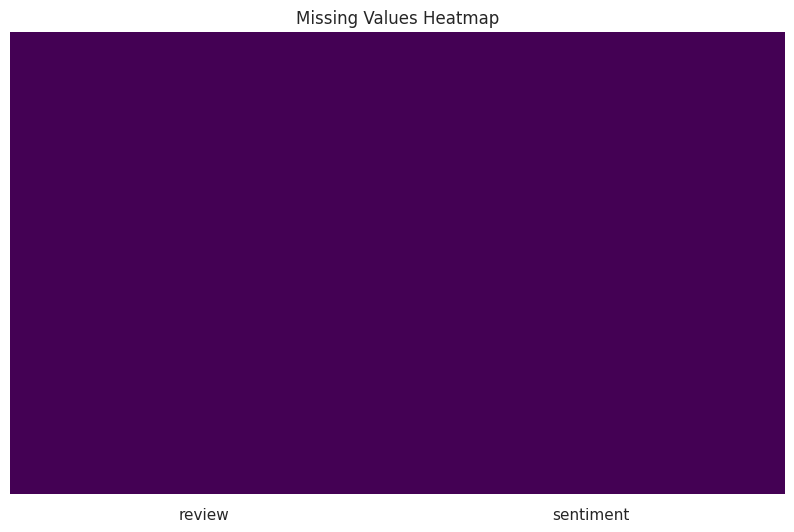

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sentiment", data=df, palette=["red", "green"])
plt.title("Sentiment Distribution (Positive vs. Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


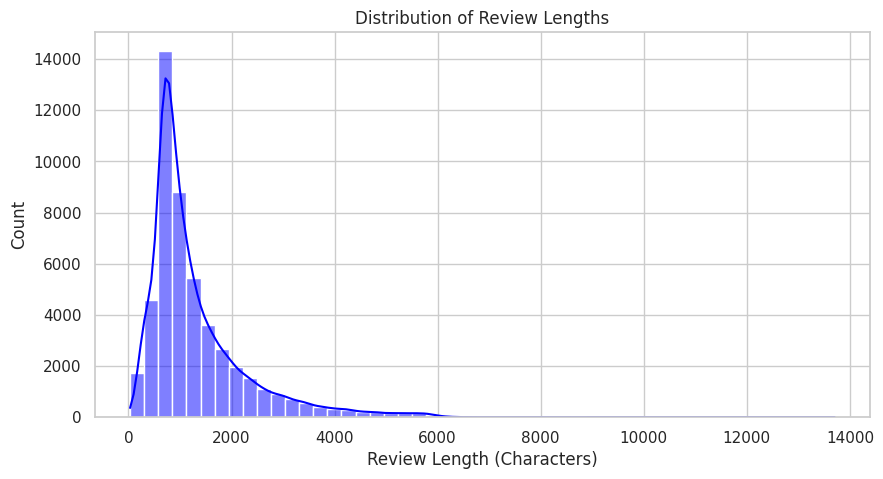

In [ ]:
df["review_length"] = df["review"].astype(str).apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df["review_length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (Characters)")
plt.ylabel("Count")
plt.show()


In [ ]:
def clean_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return words

word_list = df["review"].astype(str).apply(clean_text).sum()

common_words = Counter(word_list).most_common(20)
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Word", data=common_df, palette="coolwarm")
plt.title("Top 20 Most Common Words in IMDb Reviews")
plt.show()


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(word_list))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of IMDb Reviews")
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment", y="review_length", data=df, palette=["red", "green"])
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.show()
